In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:

from statsmodels.tsa.stattools import acf



In [4]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.regression.linear_model import yule_walker

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats as stats

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro



In [6]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [7]:
warnings.filterwarnings("ignore")

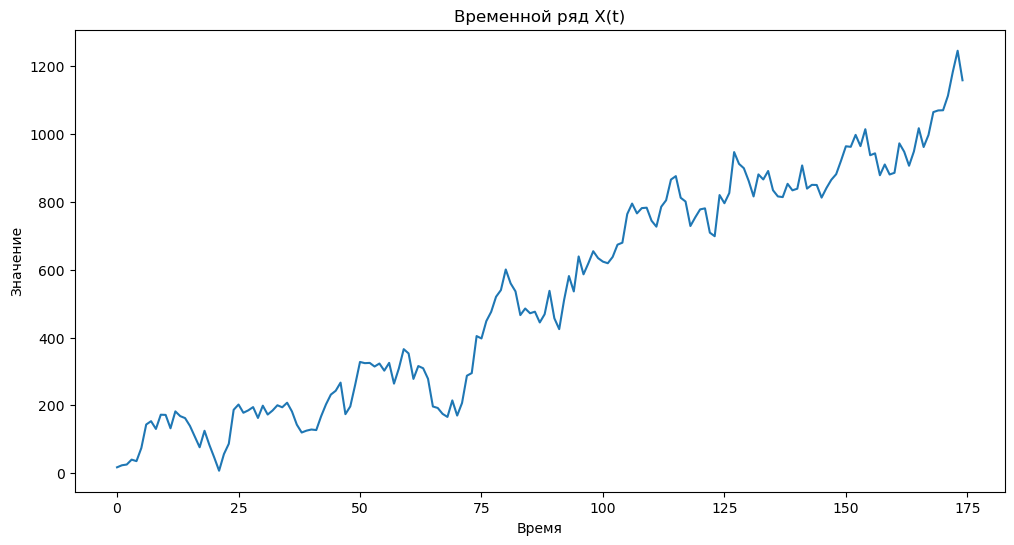

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Данные временного ряда
time_series = [17.0000,23.0000,25.2354,39.6491,35.2552,73.9997,143.2841,153.1103,130.2237,172.1872,171.6553,132.1294,182.0325,
              168.0567,162.1791,139.2174,107.8346,76.1261,124.8165,83.0986,46.0460,6.9294,56.0832,86.5169,186.6789,202.3058,
              177.9922,185.0028,194.6745,162.6456,198.8574,172.6712,184.5142,200.0594,194.1130,207.6089,181.6779,142.8642,
              119.6452,125.2224,128.5434,126.8532,167.5968,202.6866,231.5407,242.8103,266.8853,173.8134,196.5902,260.0115,
              327.8365,324.3268,325.0592,314.4030,323.2311,302.2277,325.1269,263.9346,308.8618,365.5807,353.0392,277.8775,
              315.7841,309.2576,278.1210,196.4663,192.0878,174.6470,165.6463,214.3944,169.7009,206.7766,287.2260,294.9810,
              404.2357,397.1584,448.4057,475.8357,520.1758,539.9372,600.7102,559.7544,536.1050,466.1449,485.5442,471.5607,
              476.1470,444.4067,468.6576,537.7557,456.7797,424.6770,510.5146,581.3456,535.9052,639.2100,586.4346,619.0384,
              654.6076,634.2372,623.8221,619.1523,637.7118,673.9272,679.7742,764.2042,795.1885,766.2505,781.8180,783.0181,
              744.6925,727.0563,785.8631,804.9485,866.0080,876.1682,812.3542,801.2160,728.9887,754.5885,778.0073,781.0623,
              709.4399,698.8602,820.2885,796.2198,826.2669,947.0973,912.4338,899.4832,861.8526,816.2235,881.2737,866.3227,
              891.3273,834.5407,816.3082,814.2838,853.4694,834.2457,839.1276,907.7284,839.3584,850.4133,850.0238,812.8109,
              841.0763,865.3595,881.8762,921.7215,964.2259,962.6344,997.8980,964.7074,1014.6031,937.8121,943.4377,878.8066,
              910.5041,881.0033,885.9845,972.8630,948.1887,906.8332,949.0345,1017.5281,962.0907,997.6574,1065.1217,1070.0038,
              1070.5408,1113.1003,1183.6935,1246.1910,1159]

# Создание DataFrame
df = pd.DataFrame({'X(t)': time_series})

# Визуализация временного ряда
plt.figure(figsize=(12,6))
plt.plot(df['X(t)'])
plt.title('Временной ряд X(t)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   X(t)   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     2685.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          2.72e-107
Time:                        12:58:26   Log-Likelihood:                -1018.8
No. Observations:                 175   AIC:                             2042.
Df Residuals:                     173   BIC:                             2048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.5513     12.471     -2.530      0.0

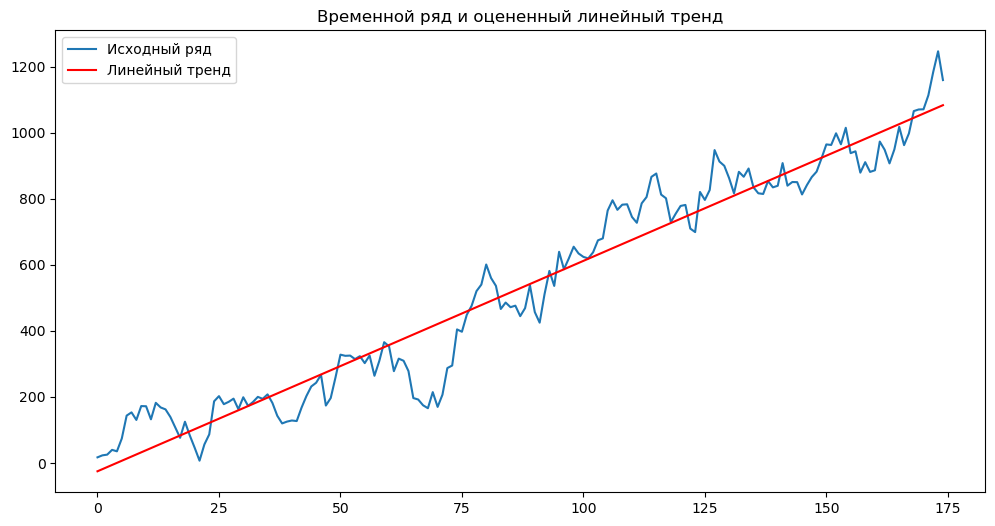

In [44]:
import numpy as np
import statsmodels.api as sm

# Добавление тренда
df['Time'] = np.arange(1, len(df) + 1)

# Пояснения:
# Модель: X(t) = a + b * t + Ошибка

X = sm.add_constant(df['Time'])  # Добавляем константу (перехват)
y = df['X(t)']

# МНК оценка параметров
model = sm.OLS(y, X).fit()
print(model.summary())

# Визуализация модели тренда
plt.figure(figsize=(12,6))
plt.plot(df['X(t)'], label='Исходный ряд')
plt.plot(model.fittedvalues, color='red', label='Линейный тренд')
plt.legend()
plt.title('Временной ряд и оцененный линейный тренд')
plt.show()

Text(0.5, 1.0, 'Детрендированный временной ряд')

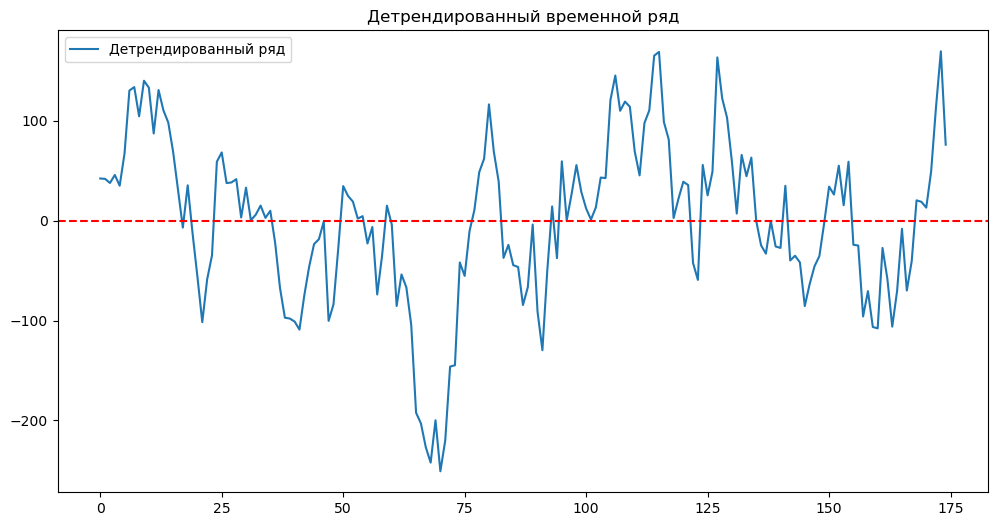

In [10]:
# Детрендирование
df['Detrended'] = y - model.fittedvalues

# Визуализация детрендированного ряда
plt.figure(figsize=(12,6))
plt.plot(df['Detrended'], label='Детрендированный ряд')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.title('Детрендированный временной ряд')

In [11]:
df['Detrended']

0       42.182404
1       41.813468
2       37.679933
3       45.724697
4       34.961861
          ...    
170     13.004109
171     49.194674
172    113.418938
173    169.547502
174     75.987566
Name: Detrended, Length: 175, dtype: float64

In [12]:
n = len(y)

# Порядковый номер каждой точки времени
t = np.arange(1, n + 1)

# Вычисляем коэффициенты a и b
b = (n * np.sum(t * y) - np.sum(t) * np.sum(y)) / (n * np.sum(t ** 2) - (np.sum(t)) ** 2)
a = (np.sum(y) - b * np.sum(t)) / n

a, b

(-31.551340177339235, 6.368935852664571)

In [13]:
ones=[1 for i in range(n)]
A=zip(ones,t)
A=np.array(list(A))


In [14]:
res=np.linalg.inv(A.T@A)@A.T@time_series

In [15]:
res

array([-31.55134018,   6.36893585])

In [16]:
#все верно

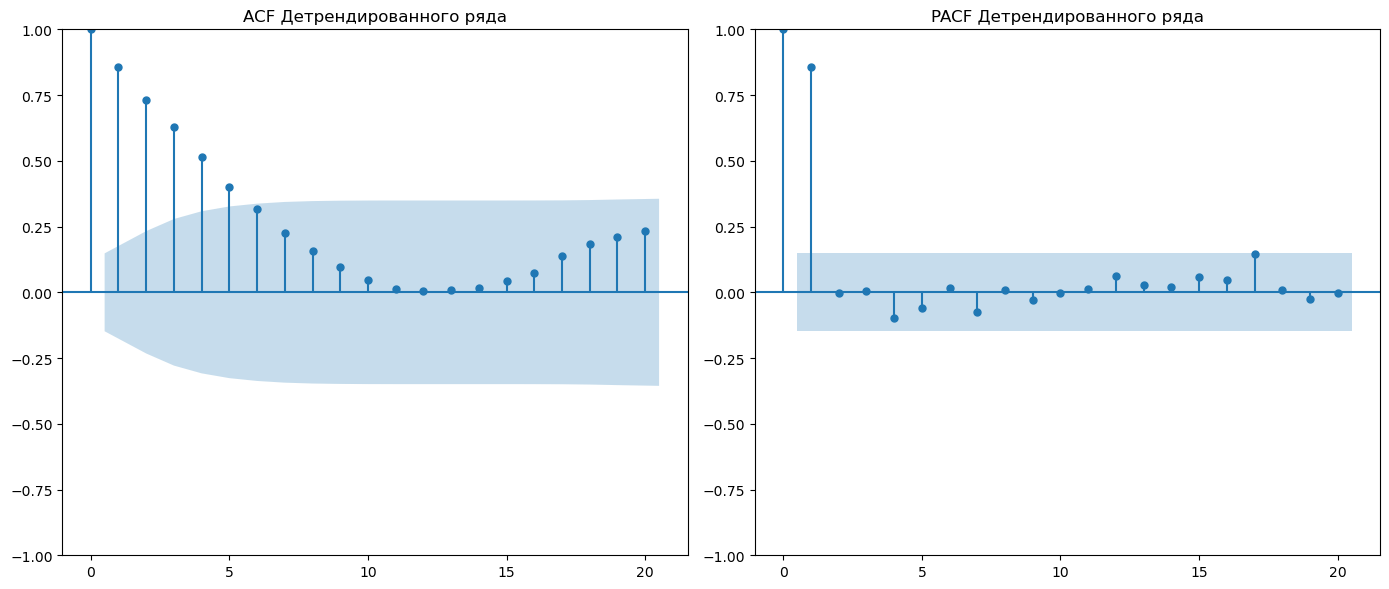

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plot_acf(df['Detrended'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF Детрендированного ряда')

plt.subplot(1,2,2)
plot_pacf(df['Detrended'].dropna(), lags=20, ax=plt.gca())
plt.title('PACF Детрендированного ряда')

plt.tight_layout()
plt.show()

In [18]:
df

,X(t),Time,Detrended
0,17.0000,1,42.182404
1,23.0000,2,41.813468
2,25.2354,3,37.679933
3,39.6491,4,45.724697
4,35.2552,5,34.961861
...,...,...,...
170,1070.5408,171,13.004109
171,1113.1003,172,49.194674
172,1183.6935,173,113.418938
173,1246.1910,174,169.547502


In [19]:
#1) Модель AR(q)

In [20]:
# Диапазон параметров
p_values = range(1, 6)
results = []

for p in p_values:
    model = ARIMA(df['Detrended'], order=(p, 0, 0))
    model_fit = model.fit()
    results.append({
                    'p': (p,0,0),
                    'AIC': model_fit.aic,
                    'BIC': model_fit.bic
                })


results_df = pd.DataFrame(results)

print(results_df.head(5))

# Лучшая модель по AIC и BIC
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]
print(f"\nЛучшая модель по AIC: {best_aic['p']} с AIC = {best_aic['AIC']}")
print(f"Лучшая модель по BIC: {best_bic['p']} с BIC = {best_bic['BIC']}")

           p          AIC          BIC
0  (1, 0, 0)  1810.826118  1820.320476
1  (2, 0, 0)  1812.737236  1825.396380
2  (3, 0, 0)  1814.737174  1830.561104
3  (4, 0, 0)  1814.667892  1833.656608
4  (5, 0, 0)  1815.657614  1837.811116

Лучшая модель по AIC: (1, 0, 0) с AIC = 1810.8261183363431
Лучшая модель по BIC: (1, 0, 0) с BIC = 1820.3204762581138


                               SARIMAX Results                                
Dep. Variable:              Detrended   No. Observations:                  175
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -902.413
Date:                Mon, 02 Dec 2024   AIC                           1810.826
Time:                        11:52:07   BIC                           1820.320
Sample:                             0   HQIC                          1814.677
                                - 175                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7761     22.195      0.170      0.865     -39.725      47.277
ar.L1          0.8567      0.039     21.908      0.000       0.780       0.933
sigma2      1750.8397    192.356      9.102      0.0

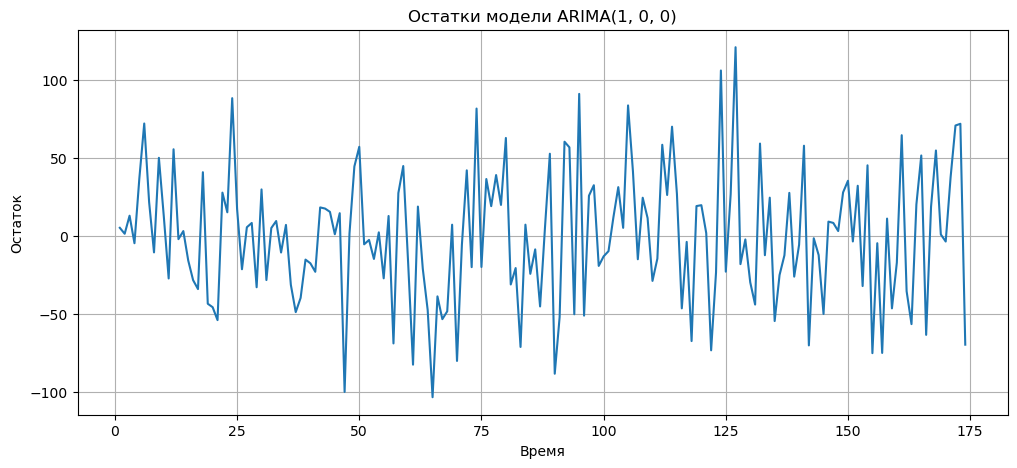

      lb_stat  lb_pvalue
1    0.038324   0.844794
2    0.052115   0.974279
3    1.852713   0.603532
4    2.087228   0.719719
5    2.650390   0.753695
6    2.966798   0.813002
7    3.185475   0.867330
8    3.216367   0.920055
9    3.614558   0.934904
10   3.859800   0.953450
11   5.082593   0.927101
12   5.383591   0.943925
13   5.549273   0.961032
14   5.840365   0.970356
15   5.952246   0.980539
16   7.763352   0.955601
17   8.395985   0.957331
18   9.342805   0.951265
19   9.649337   0.961072
20  12.110257   0.912229

Общее p-значение для теста Люнга-Бокса до лага 20: 0.9122287187797038
Не отвергаем нулевую гипотезу при уровне значимости 0.05. Остатки являются белым шумом.


In [21]:
# Построение выбранной модели
best_model_order = best_aic['p']
model1 = ARIMA(df['Detrended'], order=best_model_order)
model_fit1 = model1.fit()
print(model_fit1.summary())

# Анализ остатков
residuals = model_fit1.resid

plt.figure(figsize=(12,5))
plt.plot(residuals[1:])
plt.title(f'Остатки модели ARIMA{best_model_order}')
plt.xlabel('Время')
plt.ylabel('Остаток')
plt.grid(True)
plt.show()

# ACF и PACF остатков
#plt.figure(figsize=(12,5))
#plt.subplot(1, 2, 1)
#plot_acf(residuals, lags=20, ax=plt.gca())
#plt.title('ACF Остатков')

# Интерпретация остатков
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=20, return_df=True)
print(lb_test)

# Получение общего p-value для лага 20
overall_pvalue = lb_test['lb_pvalue'].iloc[-1]
print(f"\nОбщее p-значение для теста Люнга-Бокса до лага 20: {overall_pvalue}")

# Решение на основе p-value
alpha = 0.05
if overall_pvalue < alpha:
    print(f"Отвергаем нулевую гипотезу при уровне значимости {alpha}. Остатки имеют автокорреляцию.")
else:
    print(f"Не отвергаем нулевую гипотезу при уровне значимости {alpha}. Остатки являются белым шумом.")

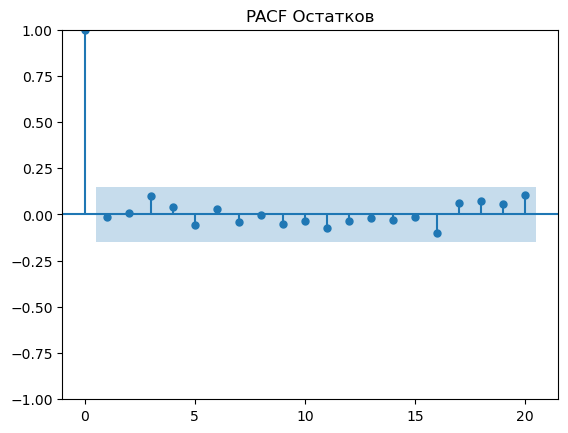

In [22]:

plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF Остатков')
plt.show()

In [23]:
model_fit1.params


const        3.776136
ar.L1        0.856720
sigma2    1750.839724
dtype: float64

In [24]:
#dict_coef=dict(model_fit.params)
#dict_coef

In [25]:
#model_fit.params.get('ar.L1')

In [26]:
coefficients1 = model_fit1.params
print("Коэффициенты модели AR(1):")
print(coefficients1)

Коэффициенты модели AR(1):
const        3.776136
ar.L1        0.856720
sigma2    1750.839724
dtype: float64


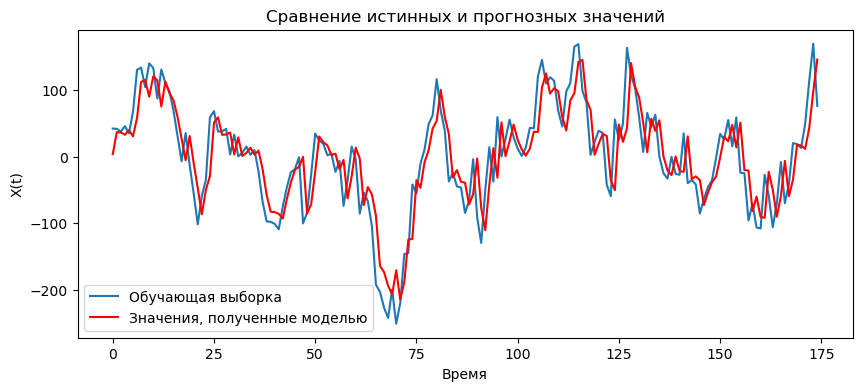

In [27]:
pred_in_sample = model_fit1.predict(dynamic=False)

pred=pred_in_sample
# Визуализация
plt.figure(figsize=(10,4))
plt.plot(df['Detrended'], label='Обучающая выборка')
plt.plot(pred, color='red', label='Значения, полученные моделью')#train['Predictions']
plt.title('Сравнение истинных и прогнозных значений')
plt.xlabel('Время')
plt.ylabel('X(t)')
plt.legend()
plt.show()

In [28]:
#модели MA(q)

In [29]:
# Диапазон параметров
q_values = range(1, 6)
results = []

for q in q_values:
    model = ARIMA(df['Detrended'], order=(0, 0, q))
    model_fit = model.fit()
    results.append({
                    'q': (0,0,q),
                    'AIC': model_fit.aic,
                    'BIC': model_fit.bic
                })


results_df = pd.DataFrame(results)

print(results_df.head(5))

# Лучшая модель по AIC и BIC
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]
print(f"\nЛучшая модель по AIC: {best_aic['q']} с AIC = {best_aic['AIC']}")
print(f"Лучшая модель по BIC: {best_bic['q']} с BIC = {best_bic['BIC']}")

           q          AIC          BIC
0  (0, 0, 1)  1918.810002  1928.304360
1  (0, 0, 2)  1871.776555  1884.435699
2  (0, 0, 3)  1850.074350  1865.898280
3  (0, 0, 4)  1831.286729  1850.275445
4  (0, 0, 5)  1827.358939  1849.512441

Лучшая модель по AIC: (0, 0, 5) с AIC = 1827.3589388259106
Лучшая модель по BIC: (0, 0, 5) с BIC = 1849.5124406433752


In [30]:
best_aic['q']

(0, 0, 5)

                               SARIMAX Results                                
Dep. Variable:              Detrended   No. Observations:                  175
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -906.679
Date:                Mon, 02 Dec 2024   AIC                           1827.359
Time:                        11:52:10   BIC                           1849.512
Sample:                             0   HQIC                          1836.345
                                - 175                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0380     12.966      0.003      0.998     -25.375      25.451
ma.L1          0.8532      0.087      9.811      0.000       0.683       1.024
ma.L2          0.6996      0.099      7.097      0.0

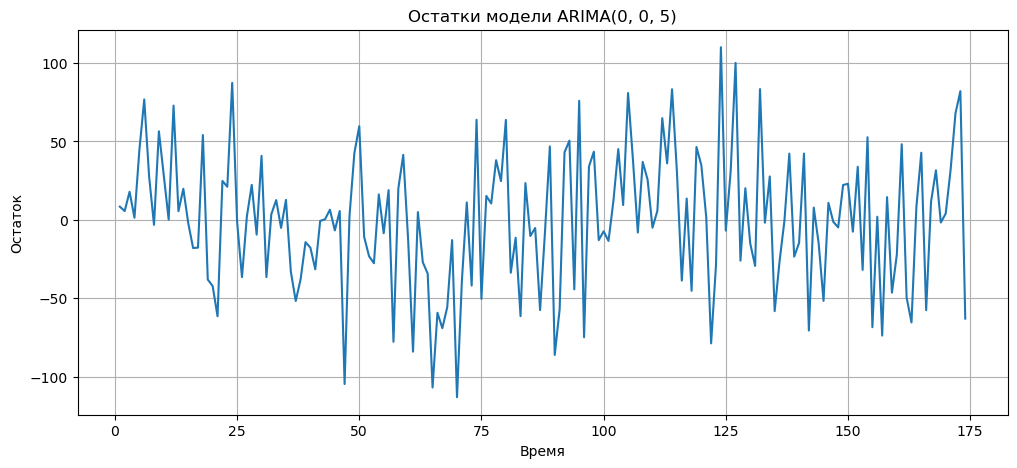

      lb_stat  lb_pvalue
1    0.211900   0.645282
2    1.236940   0.538768
3    2.981205   0.394532
4    5.097203   0.277468
5    8.650491   0.123844
6   13.918635   0.030558
7   13.952703   0.052029
8   14.098528   0.079233
9   14.098851   0.118852
10  14.156385   0.165977
11  14.242118   0.219884
12  14.245844   0.285285
13  14.246888   0.356690
14  14.247106   0.431468
15  14.405538   0.495021
16  15.152365   0.513509
17  15.628464   0.550309
18  16.520008   0.556305
19  16.928418   0.594717
20  19.742878   0.474114

Общее p-значение для теста Люнга-Бокса до лага 20: 0.4741137521716424
Не отвергаем нулевую гипотезу при уровне значимости 0.05. Остатки являются белым шумом.


In [31]:
# Построение выбранной модели
best_model_order = best_aic['q']
model2 = ARIMA(df['Detrended'], order=best_model_order)
model_fit2 = model2.fit()
print(model_fit2.summary())

# Анализ остатков
residuals = model_fit2.resid

plt.figure(figsize=(12,5))
plt.plot(residuals[1:])
plt.title(f'Остатки модели ARIMA{best_model_order}')
plt.xlabel('Время')
plt.ylabel('Остаток')
plt.grid(True)
plt.show()

# ACF и PACF остатков
#plt.figure(figsize=(12,5))
#plt.subplot(1, 2, 1)
#plot_acf(residuals, lags=20, ax=plt.gca())
#plt.title('ACF Остатков')


# Интерпретация остатков
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=20, return_df=True)
print(lb_test)

# Получение общего p-value для лага 20
overall_pvalue = lb_test['lb_pvalue'].iloc[-1]
print(f"\nОбщее p-значение для теста Люнга-Бокса до лага 20: {overall_pvalue}")

# Решение на основе p-value
alpha = 0.05
if overall_pvalue < alpha:
    print(f"Отвергаем нулевую гипотезу при уровне значимости {alpha}. Остатки имеют автокорреляцию.")
else:
    print(f"Не отвергаем нулевую гипотезу при уровне значимости {alpha}. Остатки являются белым шумом.")

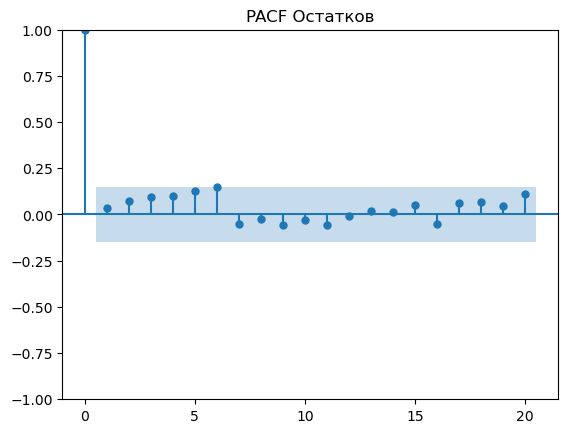

In [32]:

plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF Остатков')
plt.show()


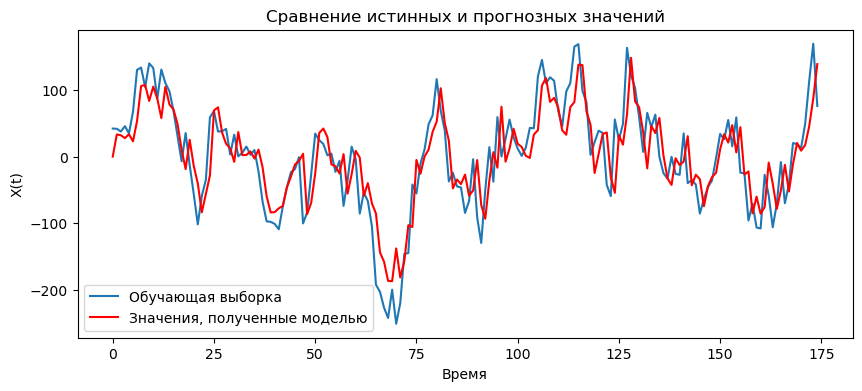

In [33]:
pred_in_sample = model_fit2.predict(dynamic=False)

# Добавление прогнозов в DataFrame
#train['Predictions'] = pred_in_sample
pred=pred_in_sample
# Визуализация
plt.figure(figsize=(10,4))
plt.plot(df['Detrended'], label='Обучающая выборка')
plt.plot(pred, color='red', label='Значения, полученные моделью')#train['Predictions']
plt.title('Сравнение истинных и прогнозных значений')
plt.xlabel('Время')
plt.ylabel('X(t)')
plt.legend()
plt.show()

In [34]:
#ARMA

Первые 10 моделей и их AIC/BIC:
        order          AIC          BIC
0   (1, 0, 1)  1812.771541  1825.430685
1   (1, 0, 2)  1814.765763  1830.589693
2   (1, 0, 3)  1814.820725  1833.809441
3   (1, 0, 4)  1816.170312  1838.323813
4   (2, 0, 1)  1814.737230  1830.561160
5   (2, 0, 2)  1815.235022  1834.223738
6   (2, 0, 3)  1816.111605  1838.265106
7   (2, 0, 4)  1817.293634  1842.611922
8   (3, 0, 1)  1816.613539  1835.602254
9   (3, 0, 2)  1811.865222  1834.018724
10  (3, 0, 3)  1818.061600  1843.379888
11  (3, 0, 4)  1819.444102  1847.927176
12  (4, 0, 1)  1815.831880  1837.985382
13  (4, 0, 2)  1817.839890  1843.158177
14  (4, 0, 3)  1819.581700  1848.064774
15  (4, 0, 4)  1818.054156  1849.702015

Лучшая модель по AIC: (3, 0, 2) с AIC = 1811.8652221970424
Лучшая модель по BIC: (1, 0, 1) с BIC = 1825.4306851838228
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  175
Model:     

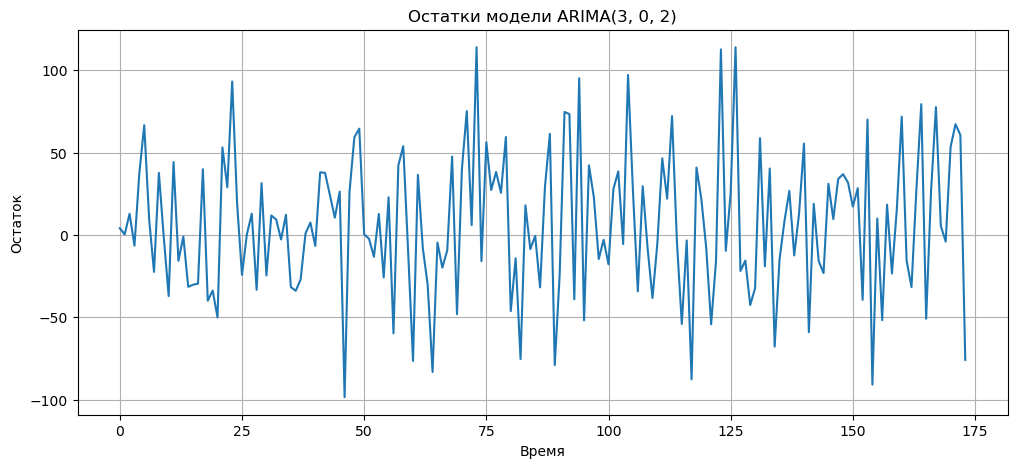

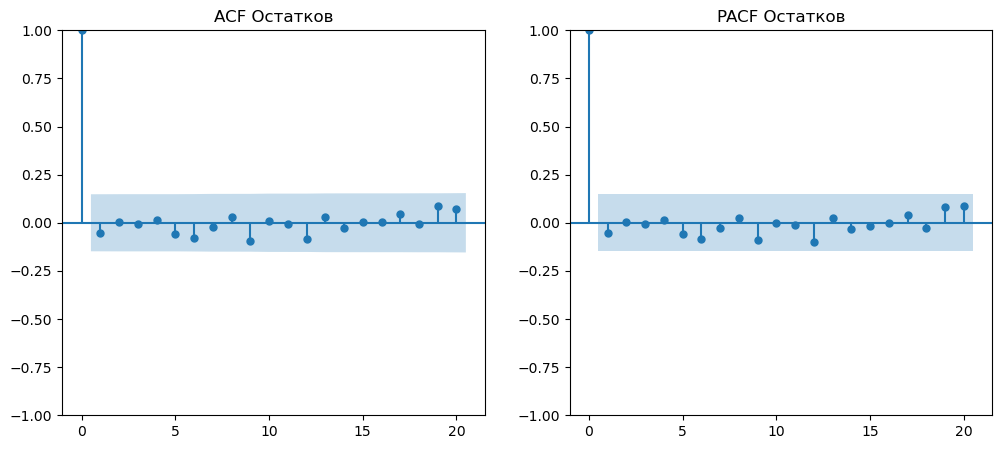

     lb_stat  lb_pvalue
1   0.480064   0.488393
2   0.485343   0.784529
3   0.490037   0.921075
4   0.539599   0.969533
5   1.208005   0.944107
6   2.293229   0.890853
7   2.369924   0.936569
8   2.516677   0.960949
9   4.200171   0.897751
10  4.216810   0.937037
11  4.220644   0.963012
12  5.648897   0.932737
13  5.844029   0.951646
14  5.969508   0.967254
15  5.972433   0.980207
16  5.972876   0.988386
17  6.420450   0.989886
18  6.433963   0.994095
19  7.858215   0.988042
20  8.905606   0.983975

Общее p-значение для теста Люнга-Бокса до лага 20: 0.9839749904560308
Не отвергаем нулевую гипотезу при уровне значимости 0.05. Остатки являются белым шумом.


In [35]:
# Диапазон параметров
p_values = range(1, 5)

q_values = range(1, 5)
results = []

for p in p_values:

    for q in q_values:
        try:
            model = ARIMA(df['Detrended'], order=(p, 0, q))
            model_fit = model.fit()
            results.append({
                    'order': (p, 0, q),
                    'AIC': model_fit.aic,
                    'BIC': model_fit.bic
                })
        except:
            continue

results_df = pd.DataFrame(results)
print("Первые 10 моделей и их AIC/BIC:")
print(results_df.head(4*4))

# Лучшая модель по AIC и BIC
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]
print(f"\nЛучшая модель по AIC: {best_aic['order']} с AIC = {best_aic['AIC']}")
print(f"Лучшая модель по BIC: {best_bic['order']} с BIC = {best_bic['BIC']}")

# Построение выбранной модели
best_model_order = best_aic['order']
model = ARIMA(time_series, order=best_model_order)
model_fit = model.fit()
print(model_fit.summary())

# Анализ остатков
residuals = model_fit.resid

plt.figure(figsize=(12,5))
plt.plot(residuals[1:])
plt.title(f'Остатки модели ARIMA{best_model_order}')
plt.xlabel('Время')
plt.ylabel('Остаток')
plt.grid(True)
plt.show()

# ACF и PACF остатков
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF Остатков')

plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF Остатков')
plt.show()

# Интерпретация остатков
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=20, return_df=True)
print(lb_test)

# Получение общего p-value для лага 20
overall_pvalue = lb_test['lb_pvalue'].iloc[-1]
print(f"\nОбщее p-значение для теста Люнга-Бокса до лага 20: {overall_pvalue}")

# Решение на основе p-value
alpha = 0.05
if overall_pvalue < alpha:
    print(f"Отвергаем нулевую гипотезу при уровне значимости {alpha}. Остатки имеют автокорреляцию.")
else:
    print(f"Не отвергаем нулевую гипотезу при уровне значимости {alpha}. Остатки являются белым шумом.")
                

In [36]:
model_fit.params

array([ 5.28921881e+02, -1.56299235e-01,  1.66818856e-01,  9.78202724e-01,
        1.18014556e+00,  9.76087440e-01,  1.78962841e+03])

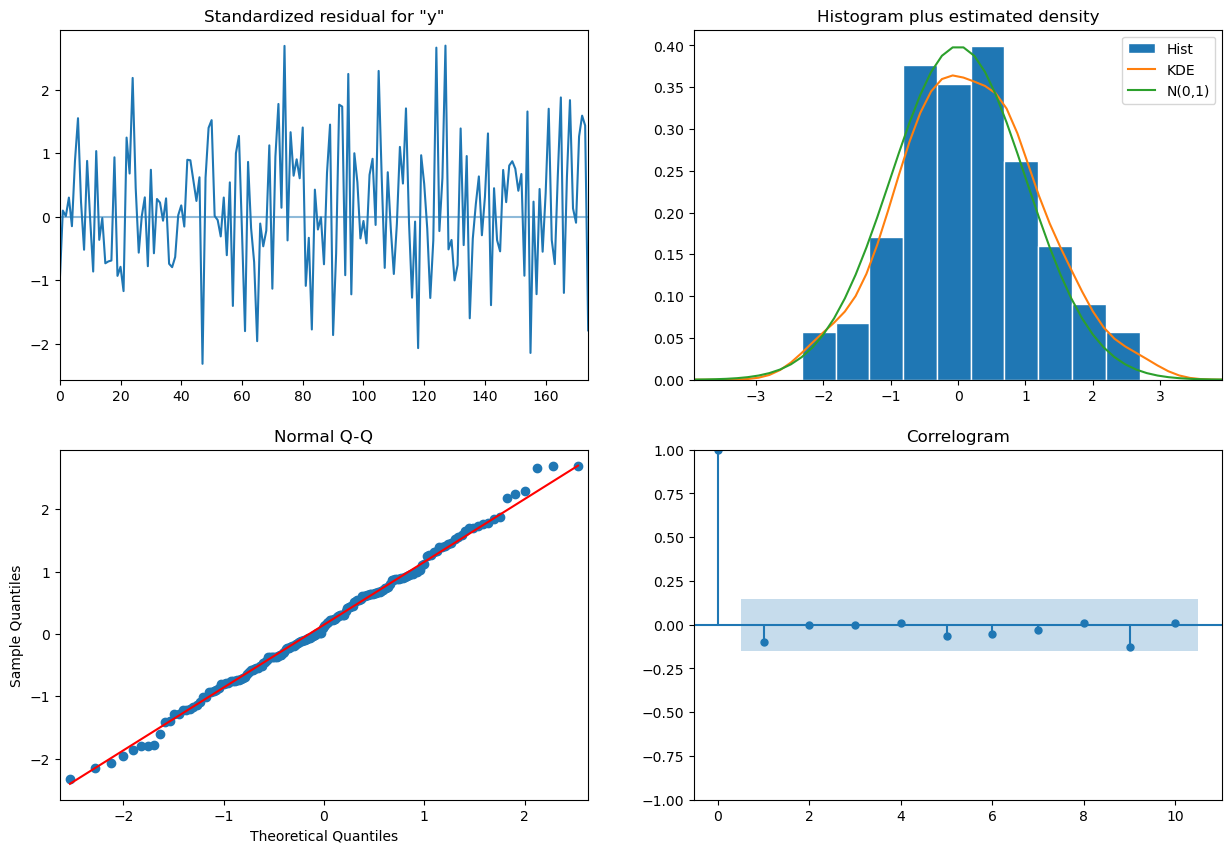

In [37]:
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()


In [38]:
# Определение доли обучающей выборки
train_size = int(len(list(df['Detrended'])) * 0.8)
train, test = df['Detrended'].iloc[:train_size], df['Detrended'].iloc[train_size:]

print(f"Размер обучающей выборки: {len(train)}")
print(f"Размер тестовой выборки: {len(test)}")

Размер обучающей выборки: 140
Размер тестовой выборки: 35


In [39]:
# Определение порядка модели AR(2)
p = 3
d = 0
q = 2

# Построение и фиттинг модели ARIMA на обучающих данных
model = ARIMA(df['Detrended'], order=(p, d, q))#df['Detrended']
model_fit = model.fit()

In [40]:
#!!!!!!!!!!! Можно задать

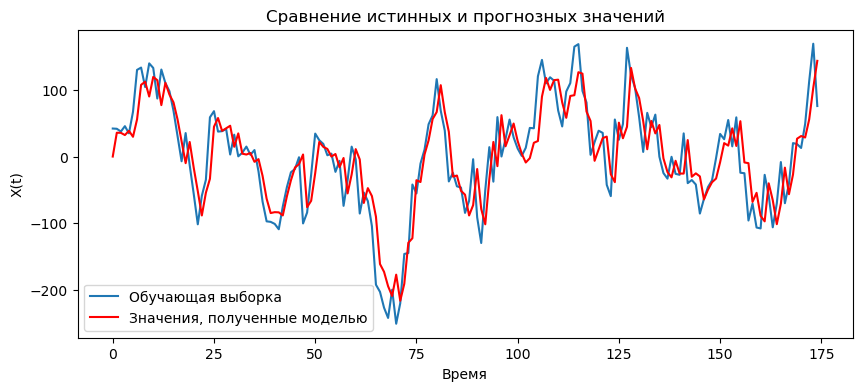

In [45]:
#train_size = int(len(df['Detrended']) * 0.8)
#train, test = df.iloc[:train_size], df.iloc[train_size:]
# Прогнозирование на обучающих данных
pred_in_sample = model_fit.predict(dynamic=False)

# Добавление прогнозов в DataFrame
#train['Predictions'] = pred_in_sample
pred=pred_in_sample
# Визуализация
plt.figure(figsize=(10,4))
plt.plot(df['Detrended'], label='Обучающая выборка')
plt.plot(pred, color='red', label='Значения, полученные моделью')#train['Predictions']
plt.title('Сравнение истинных и прогнозных значений')
plt.xlabel('Время')
plt.ylabel('X(t)')
plt.legend()
plt.show()

In [42]:
len(list(df['Detrended']))

175

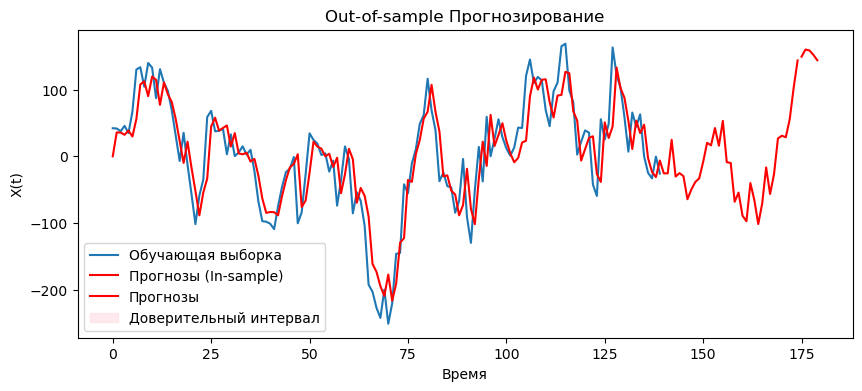

In [43]:
n_forecast = len(test)

# Получение прогноза
forecast = model_fit.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Создание DataFrame для прогнозов
forecast_df = pd.DataFrame({
    'Forecast': forecast_mean,
    'Lower CI': forecast_conf_int.iloc[:, 0],
    'Upper CI': forecast_conf_int.iloc[:, 1]
}, index=test.index)

# Визуализация Out-of-sample прогнозирования
plt.figure(figsize=(10,4))
plt.plot(train, label='Обучающая выборка')
plt.plot(pred, color='red', label='Прогнозы (In-sample)')
plt.plot(forecast.conf_int()['upper Detrended'], color='red', label='Прогнозы')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='pink', alpha=0.3, label='Доверительный интервал')
plt.title('Out-of-sample Прогнозирование')
plt.xlabel('Время')
plt.ylabel('X(t)')
plt.legend()
plt.show()



In [ ]:
def transpose(matrix):
    


In [1]:
matrix = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]


In [ ]:

for row in transpose(matrix):
    print(row)

In [3]:
list(zip(matrix))

[([1, 2, 3],), ([4, 5, 6],), ([7, 8, 9],)]

In [ ]:
for row in transpose(matrix):
    print(row)